<a href="https://colab.research.google.com/github/joaofariastn/Projecao-populacional/blob/main/Artigo2_0E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import mean_absolute_error
# Carregar o arquivo CSV e tratar valores nulos
df = pd.read_csv('/content/drive/MyDrive/Base dados/East asia e pacific.csv')


df.dropna(inplace=True)

# Converter a coluna 'Time' para o formato datetime e defini-la como índice
df['Time'] = pd.to_datetime(df['Time'], format='%Y')
df = df.set_index('Time')
data = df['Population growth (annual %) [SP.POP.GROW]'].resample('YS').first() # Assuming you want the first value of each year
data = np.log1p(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_size = int(len(data) * 0.95)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Função para otimizar parâmetros usando Random Search para SARIMAX
def random_search_sarimax(train_data, test_data, n_iter=30):
    best_score = float('inf')
    best_order = None
    best_seasonal_order = None

    for _ in range(n_iter):
        # Gerar valores aleatórios para p, d, q, P, D, Q, s (sazonalidade)
        p = random.randint(0, 5)
        d = random.randint(0, 2)
        q = random.randint(0, 5)
        P = random.randint(0, 2)
        D = random.randint(0, 1)
        Q = random.randint(0, 2)
        s = random.choice([0, 12])

        try:
            # Ajustar o modelo SARIMAX
            model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
            model_fit = model.fit(disp=False)

            # Fazer previsão
            forecast = model_fit.get_forecast(steps=len(test_data))
            predictions = forecast.predicted_mean

            # Calcular RMSE
            rmse = mean_squared_error(test_data, predictions, squared=False)
            mae = mean_absolute_error(test_data, predictions)
            print(f'MAE: {mae:.2f}')
            # Atualizar melhor combinação de parâmetros
            if rmse < best_score:
                best_score = rmse
                best_order = (p, d, q)
                best_seasonal_order = (P, D, Q, s)

        except:
            # Ignorar combinações que falham
            continue

    return best_order, best_seasonal_order, best_score

# Otimizar os parâmetros
best_order, best_seasonal_order, best_score = random_search_sarimax(
    train_data['Population growth (annual %) [SP.POP.GROW]'],
    test_data['Population growth (annual %) [SP.POP.GROW]']
)
print(f"Melhor combinação de parâmetros: {best_order} e sazonalidade: {best_seasonal_order} com RMSE: {best_score:.2f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 

MAE: 0.36


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


MAE: 0.22


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.25


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few 

MAE: 0.22


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.22


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.43


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.17


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


MAE: 0.16


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.47


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.25


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.17


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.27


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.32


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.18


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-inv

MAE: 0.05


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-inv

MAE: 0.36
MAE: 0.14
Melhor combinação de parâmetros: (4, 2, 3) e sazonalidade: (0, 1, 0, 12) com RMSE: 0.05


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


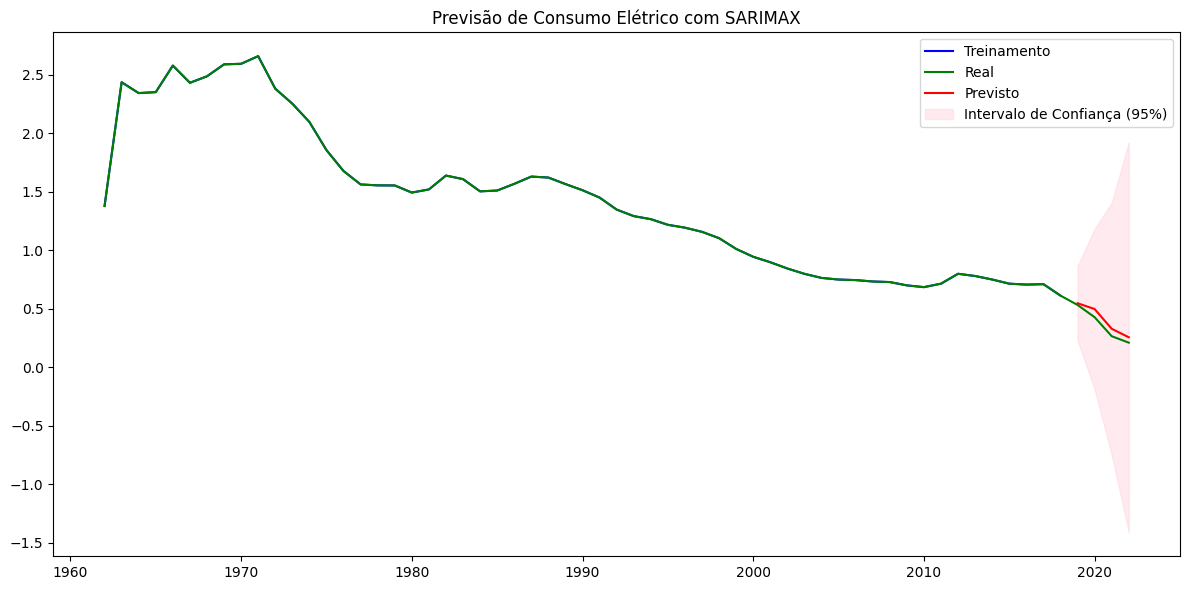

In [ ]:
model = SARIMAX(
    train_data['Population growth (annual %) [SP.POP.GROW]'],
    order=best_order,
    seasonal_order=best_seasonal_order
)
model_fit = model.fit()

# Fazer previsões sobre o conjunto de teste
forecast_steps = len(test_data)
forecast = model_fit.get_forecast(steps=forecast_steps)
predictions = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plotar as previsões contra os valores reais
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Population growth (annual %) [SP.POP.GROW]'], label='Treinamento', color='blue')
plt.plot(df['Population growth (annual %) [SP.POP.GROW]'].index, df['Population growth (annual %) [SP.POP.GROW]'], label='Real', color='green')
plt.plot(test_data.index, predictions, label='Previsto', color='red')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confiança (95%)')
plt.legend()
plt.title('Previsão de Consumo Elétrico com SARIMAX')
plt.tight_layout()
plt.show()

In [ ]:
train_size = int(len(data))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


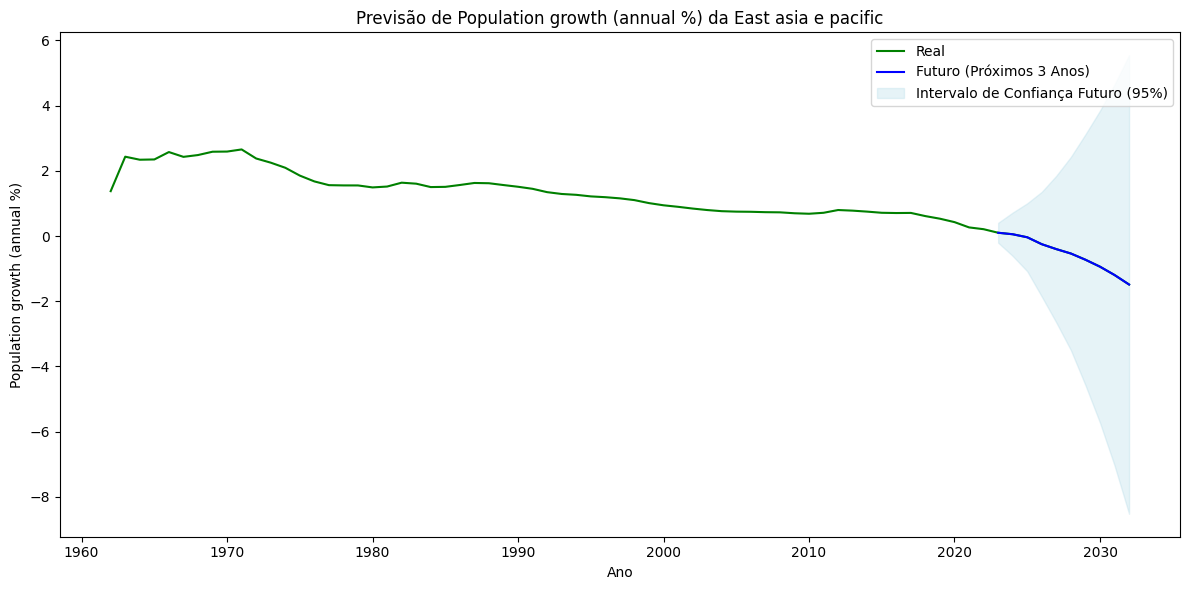

Previsões para os próximos 10 anos:
             Ano  Previsão  IC Inferior (95%)  IC Superior (95%)
2023-01-01  2023  0.101779          -0.202980           0.406538
2024-01-01  2024  0.055725          -0.608883           0.720333
2025-01-01  2025 -0.037190          -1.080168           1.005787
2026-01-01  2026 -0.249955          -1.858069           1.358160
2027-01-01  2027 -0.400524          -2.652527           1.851480
2028-01-01  2028 -0.535250          -3.499382           2.428883
2029-01-01  2029 -0.725969          -4.574086           3.122147
2030-01-01  2030 -0.939494          -5.726054           3.847065
2031-01-01  2031 -1.194557          -7.036124           4.647010
2032-01-01  2032 -1.486438          -8.519370           5.546495


In [ ]:
model = SARIMAX(
    train_data['Population growth (annual %) [SP.POP.GROW]'],
    order=best_order,
    seasonal_order=best_seasonal_order
)
model_fit = model.fit()



# Prever os próximos 3 anos
future_steps = 10
forecast_future = model_fit.get_forecast(steps=future_steps)
predictions_future = forecast_future.predicted_mean
conf_int_future = forecast_future.conf_int()

# Criar um índice de datas para os próximos 3 anos
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='YS-JAN')[1:]
future_dates
# Plotar as previsões contra os valores reais e futuros


# Plotar as previsões contra os valores reais e futuros
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df, label='Real', color='green')
plt.plot(future_dates, predictions_future, label='Futuro (Próximos 3 Anos)', color='blue')
plt.fill_between(future_dates, conf_int_future.iloc[:, 0], conf_int_future.iloc[:, 1], color='lightblue', alpha=0.3, label='Intervalo de Confiança Futuro (95%)')
plt.legend()
plt.title('Previsão de Population growth (annual %) da East asia e pacific')
plt.xlabel('Ano')
plt.ylabel('Population growth (annual %)')
plt.tight_layout()
plt.show()

# Exibir as previsões futuras com intervalo de confiança
forecast_table = pd.DataFrame({
    'Ano': future_dates.year,
    'Previsão': predictions_future,
    'IC Inferior (95%)': conf_int_future.iloc[:, 0],
    'IC Superior (95%)': conf_int_future.iloc[:, 1]
})
print("Previsões para os próximos 10 anos:")
print(forecast_table)

In [ ]:
last_date


Timestamp('2022-01-01 00:00:00')

In [ ]:
future_dates

DatetimeIndex(['2023-01-01', '2024-01-01', '2025-01-01', '2026-01-01',
               '2027-01-01', '2028-01-01', '2029-01-01', '2030-01-01',
               '2031-01-01', '2032-01-01'],
              dtype='datetime64[ns]', freq='YS-JAN')

In [ ]:
df

,Country Name,Country Code,Time Code,Population growth (annual %) [SP.POP.GROW],"Population, total [SP.POP.TOTL]","Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]"
Time,,,,,,
1962-01-01,East Asia & Pacific,EAS,YR1962,1.377452,1.059600e+09,10.856995
1963-01-01,East Asia & Pacific,EAS,YR1963,2.434757,1.085399e+09,10.770002
1964-01-01,East Asia & Pacific,EAS,YR1964,2.342030,1.110819e+09,11.561035
1965-01-01,East Asia & Pacific,EAS,YR1965,2.350317,1.136927e+09,10.674971
1966-01-01,East Asia & Pacific,EAS,YR1966,2.577178,1.166228e+09,9.801464
...,...,...,...,...,...,...
2018-01-01,East Asia & Pacific,EAS,YR2018,0.612373,2.341384e+09,7.222431
2019-01-01,East Asia & Pacific,EAS,YR2019,0.532727,2.353857e+09,7.253500
2020-01-01,East Asia & Pacific,EAS,YR2020,0.428126,2.363934e+09,7.383823


In [ ]:

predictions_future

,predicted_mean
2023-01-01,0.101779
2024-01-01,0.055725
2025-01-01,-0.037190
2026-01-01,-0.249955
2027-01-01,-0.400524
2028-01-01,-0.535250
2029-01-01,-0.725969
2030-01-01,-0.939494
2031-01-01,-1.194557
2032-01-01,-1.486438


In [ ]:
# prompt: quero que concatene
# train_size com predictions_future

# Concatenate train_data and predictions_future
concatenated_data = pd.concat([train_data['Population growth (annual %) [SP.POP.GROW]'], predictions_future])

# Reset index for both series before concatenation
train_data_reset = train_data['Population growth (annual %) [SP.POP.GROW]'].reset_index()
predictions_future_reset = predictions_future.reset_index()

# Rename columns for clarity
train_data_reset.columns = ['Time', 'Population Growth']
predictions_future_reset.columns = ['Time', 'Population Growth']

# Concatenate the dataframes
combined_df = pd.concat([train_data_reset, predictions_future_reset], ignore_index=True)

# Set 'Time' as the index again
combined_df = combined_df.set_index('Time')

# Print or use the combined dataframe as needed
combined_df

,Population Growth
Time,
1962-01-01,1.377452
1963-01-01,2.434757
1964-01-01,2.342030
1965-01-01,2.350317
1966-01-01,2.577178
...,...
2028-01-01,-0.535250
2029-01-01,-0.725969
2030-01-01,-0.939494


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1

MAE: 0.58
MAE: 1.18


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.66


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-inv

MAE: 0.59


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:

MAE: 0.69


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.56


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.55


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is 

MAE: 0.51
MAE: 0.66
MAE: 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.65


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-inve

MAE: 0.59


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.59


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.55


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.70


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


MAE: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

MAE: 0.61


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stat

MAE: 0.68
Melhor combinação de parâmetros: (2, 0, 5) e sazonalidade: (2, 1, 2, 12) com RMSE: 0.68


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


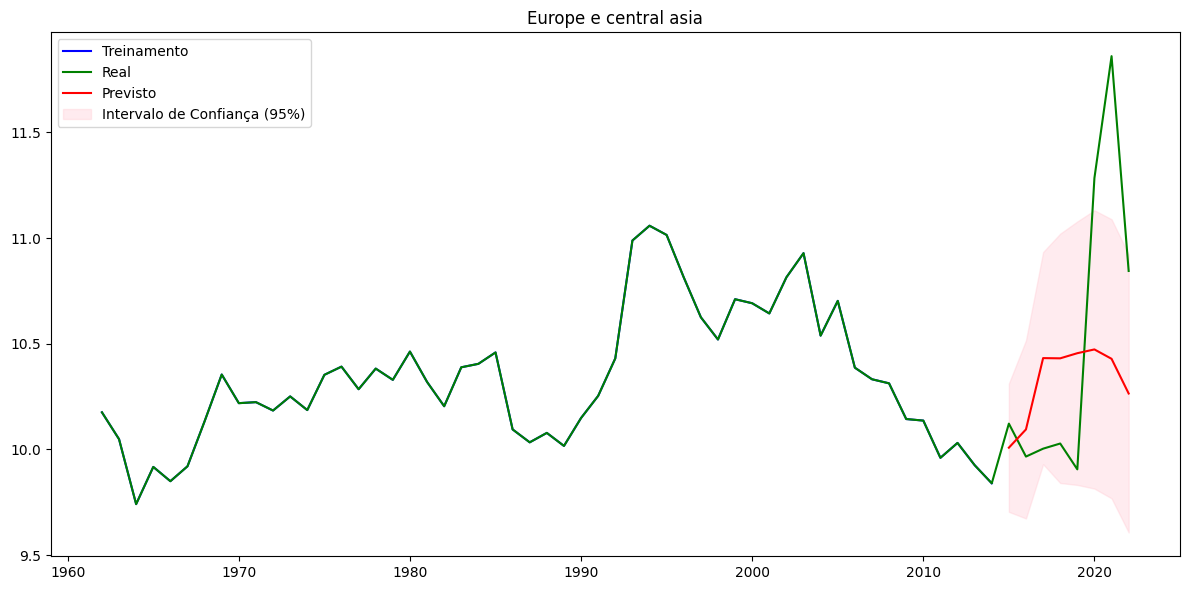

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import mean_absolute_error
# Carregar o arquivo CSV e tratar valores nulos
df = pd.read_csv('/content/drive/MyDrive/Base dados/Europe e central asia.csv')


df.dropna(inplace=True)

# Converter a coluna 'Time' para o formato datetime e defini-la como índice
df['Time'] = pd.to_datetime(df['Time'], format='%Y')
df = df.set_index('Time')
data = df['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]'].resample('YS').first() # Assuming you want the first value of each year
data = np.log1p(data)
train_size = int(len(data) * 0.87)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Função para otimizar parâmetros usando Random Search para SARIMAX
def random_search_sarimax(train_data, test_data, n_iter=30):
    best_score = float('inf')
    best_order = None
    best_seasonal_order = None

    for _ in range(n_iter):
        # Gerar valores aleatórios para p, d, q, P, D, Q, s (sazonalidade)
        p = random.randint(0, 5)
        d = random.randint(0, 2)
        q = random.randint(0, 5)
        P = random.randint(0, 2)
        D = random.randint(0, 1)
        Q = random.randint(0, 2)
        s = random.choice([0, 12])

        try:
            # Ajustar o modelo SARIMAX
            model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
            model_fit = model.fit(disp=False)

            # Fazer previsão
            forecast = model_fit.get_forecast(steps=len(test_data))
            predictions = forecast.predicted_mean

            # Calcular RMSE
            rmse = mean_squared_error(test_data, predictions, squared=False)
            mae = mean_absolute_error(test_data, predictions)
            print(f'MAE: {mae:.2f}')
            # Atualizar melhor combinação de parâmetros
            if rmse < best_score:
                best_score = rmse
                best_order = (p, d, q)
                best_seasonal_order = (P, D, Q, s)

        except:
            # Ignorar combinações que falham
            continue

    return best_order, best_seasonal_order, best_score

# Otimizar os parâmetros
best_order, best_seasonal_order, best_score = random_search_sarimax(
    train_data['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]'],
    test_data['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]']
)
print(f"Melhor combinação de parâmetros: {best_order} e sazonalidade: {best_seasonal_order} com RMSE: {best_score:.2f}")

model = SARIMAX(
    train_data['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]'],
    order=best_order,
    seasonal_order=best_seasonal_order
)
model_fit = model.fit()

# Fazer previsões sobre o conjunto de teste
forecast_steps = len(test_data)
forecast = model_fit.get_forecast(steps=forecast_steps)
predictions = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plotar as previsões contra os valores reais
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]'], label='Treinamento', color='blue')
plt.plot(df['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]'].index, df['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]'], label='Real', color='green')
plt.plot(test_data.index, predictions, label='Previsto', color='red')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confiança (95%)')
plt.legend()
plt.title('Europe e central asia')
plt.tight_layout()
plt.show()

In [ ]:
# Verificar se a série contém apenas valores numéricos
print(data.dtypes)
print(data.head())


float64
Time
1962-01-01    20.340326
1963-01-01    20.351802
1964-01-01    20.363153
1965-01-01    20.374087
1966-01-01    20.383738
Freq: YS-JAN, Name: Population, total [SP.POP.TOTL], dtype: float64


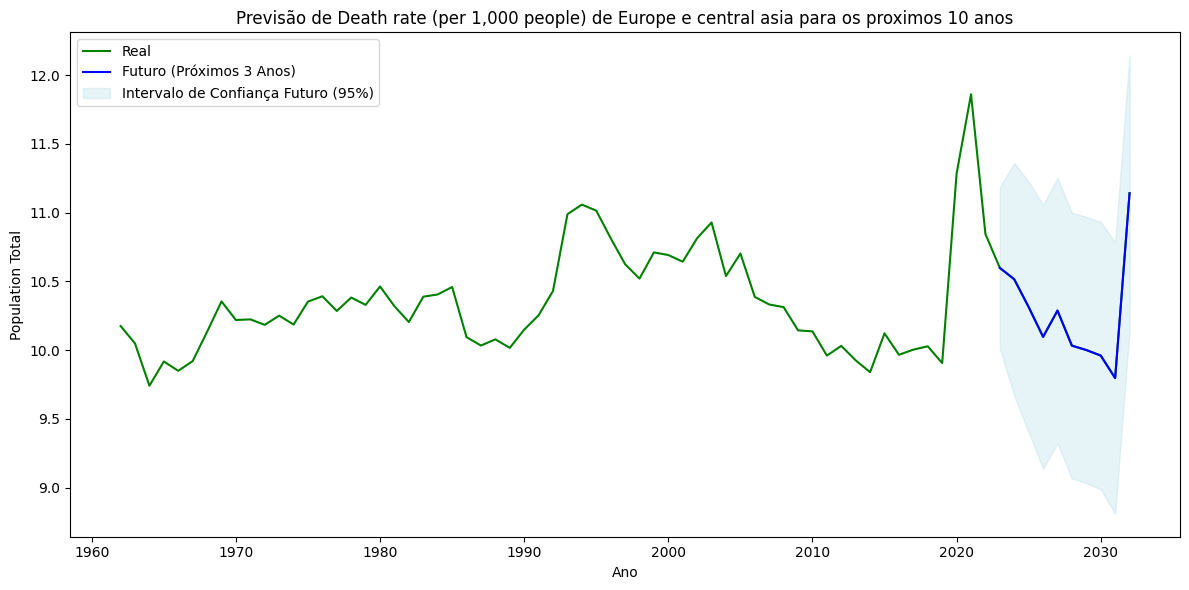

Previsões para os próximos 10 anos:
             Ano   Previsão  IC Inferior (95%)  IC Superior (95%)
2023-01-01  2023  10.597854          10.010025          11.185684
2024-01-01  2024  10.515112           9.668387          11.361838
2025-01-01  2025  10.312905           9.400318          11.225493
2026-01-01  2026  10.096266           9.137169          11.055363
2027-01-01  2027  10.287345           9.322051          11.252640
2028-01-01  2028  10.032250           9.065660          10.998839
2029-01-01  2029  10.000489           9.032237          10.968740
2030-01-01  2030   9.960120           8.986868          10.933371
2031-01-01  2031   9.796269           8.809283          10.783254
2032-01-01  2032  11.141133          10.137666          12.144601


In [ ]:
train_size = int(len(data))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

model = SARIMAX(
    train_data['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]'],
    order=best_order,
    seasonal_order=best_seasonal_order
)
model_fit = model.fit()


# Prever os próximos 3 anos
future_steps = 10
forecast_future = model_fit.get_forecast(steps=future_steps)
predictions_future = forecast_future.predicted_mean
conf_int_future = forecast_future.conf_int()

# Criar um índice de datas para os próximos 3 anos
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='YS-JAN')[1:]
future_dates
# Plotar as previsões contra os valores reais e futuros

concatenated_data = pd.concat([train_data['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]'], predictions_future])

# Reset index for both series before concatenation
train_data_reset = train_data['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]'].reset_index()
predictions_future_reset = predictions_future.reset_index()

# Rename columns for clarity
train_data_reset.columns = ['Time', 'Death rate (per 1,000 people)']
predictions_future_reset.columns = ['Time','Death rate (per 1,000 people)']

# Concatenate the dataframes
combined_df = pd.concat([train_data_reset, predictions_future_reset], ignore_index=True)

# Set 'Time' as the index again
combined_df = combined_df.set_index('Time')

# Print or use the combined dataframe as needed
combined_df
# Plotar as previsões contra os valores reais e futuros
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df, label='Real', color='green')
plt.plot(future_dates, predictions_future, label='Futuro (Próximos 3 Anos)', color='blue')
plt.fill_between(future_dates, conf_int_future.iloc[:, 0], conf_int_future.iloc[:, 1], color='lightblue', alpha=0.3, label='Intervalo de Confiança Futuro (95%)')
plt.legend()
plt.title('Previsão de Death rate (per 1,000 people) de Europe e central asia para os proximos 10 anos')
plt.xlabel('Ano')
plt.ylabel('Population Total')
plt.tight_layout()
plt.show()

# Exibir as previsões futuras com intervalo de confiança
forecast_table = pd.DataFrame({
    'Ano': future_dates.year,
    'Previsão': predictions_future,
    'IC Inferior (95%)': conf_int_future.iloc[:, 0],
    'IC Superior (95%)': conf_int_future.iloc[:, 1]
})
print("Previsões para os próximos 10 anos:")
print(forecast_table)

# Sarimax

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No

SARIMAX(0, 0, 1) sazonal (2, 1, 0, 12) RMSE=0.131
Melhor combinação de parâmetros: (0, 0, 1) e sazonalidade: (2, 1, 0, 12) com RMSE: 0.13


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(2, 1, 0) sazonal (0, 1, 2, 12) RMSE=0.170
Melhor combinação de parâmetros: (0, 0, 1) e sazonalidade: (2, 1, 0, 12) com RMSE: 0.13


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


SARIMAX(3, 0, 4) sazonal (2, 1, 2, 12) RMSE=0.378
Melhor combinação de parâmetros: (0, 0, 1) e sazonalidade: (2, 1, 0, 12) com RMSE: 0.13


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 0, 0) sazonal (2, 1, 0, 12) RMSE=0.219
Melhor combinação de parâmetros: (0, 0, 1) e sazonalidade: (2, 1, 0, 12) com RMSE: 0.13


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(4, 1, 0) sazonal (1, 1, 2, 12) RMSE=0.135
Melhor combinação de parâmetros: (0, 0, 1) e sazonalidade: (2, 1, 0, 12) com RMSE: 0.13


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


SARIMAX(3, 2, 4) sazonal (1, 1, 1, 12) RMSE=0.171
Melhor combinação de parâmetros: (0, 0, 1) e sazonalidade: (2, 1, 0, 12) com RMSE: 0.13


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


SARIMAX(4, 1, 1) sazonal (0, 0, 1, 12) RMSE=0.221
Melhor combinação de parâmetros: (0, 0, 1) e sazonalidade: (2, 1, 0, 12) com RMSE: 0.13


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


SARIMAX(3, 0, 1) sazonal (2, 0, 0, 12) RMSE=0.284
Melhor combinação de parâmetros: (0, 0, 1) e sazonalidade: (2, 1, 0, 12) com RMSE: 0.13


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


SARIMAX(2, 1, 3) sazonal (2, 1, 1, 12) RMSE=0.151
Melhor combinação de parâmetros: (0, 0, 1) e sazonalidade: (2, 1, 0, 12) com RMSE: 0.13


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(1, 1, 0) sazonal (1, 0, 1, 12) RMSE=0.292
Melhor combinação de parâmetros: (0, 0, 1) e sazonalidade: (2, 1, 0, 12) com RMSE: 0.13
sarimax - MSE: 0.017, RMSE: 0.131, MAE: 0.123


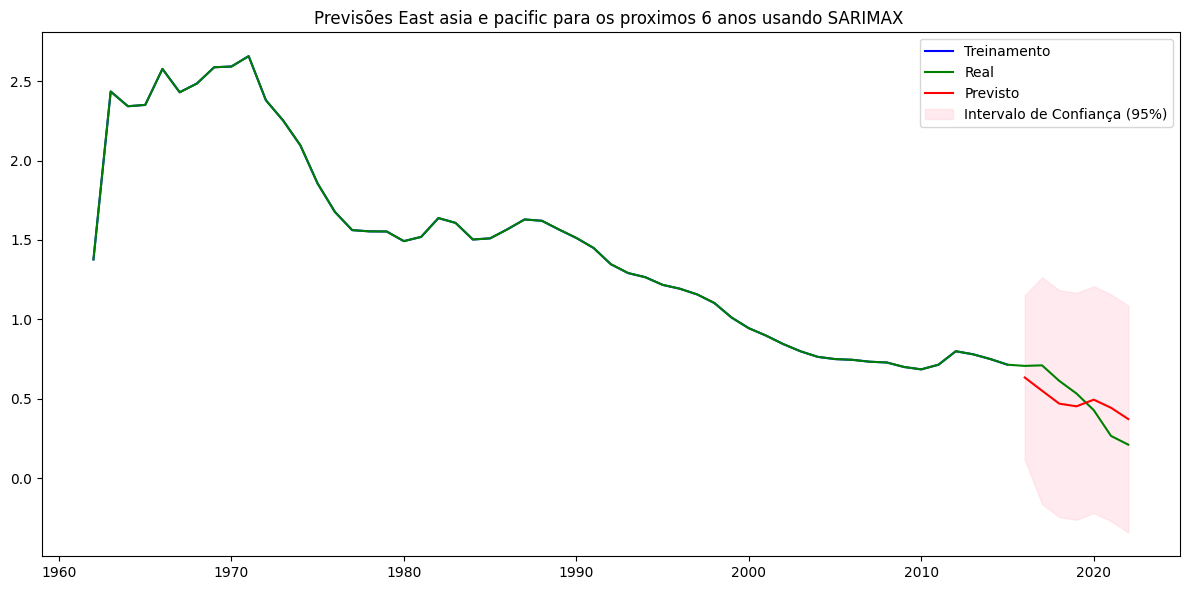

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ParameterSampler

# Carregar o arquivo CSV e tratar valores nulos
df = pd.read_csv('/content/drive/MyDrive/Base dados/East asia e pacific.csv')
df.dropna(inplace=True)

# Converter a coluna 'Time' para o formato datetime e defini-la como índice
df['Time'] = pd.to_datetime(df['Time'], format='%Y')
df = df.set_index('Time')

# Selecionar a coluna e transformar os dados
data = df['Population growth (annual %) [SP.POP.GROW]'].resample('YS').first()
data = np.log1p(data)  # Transformação logarítmica

# Divisão em treino e teste
train_size = int(len(data) * 0.90)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Função para avaliar o modelo SARIMAX
def evaluate_sarimax_model(train, test, order, seasonal_order):
    try:
        # Ajustar o modelo SARIMAX
        model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)

        # Fazer previsões
        forecast = model_fit.get_forecast(steps=len(test))
        predictions = forecast.predicted_mean

        # Calcular RMSE
        rmse = mean_squared_error(test, predictions, squared=False)
        return rmse
    except Exception as e:
        print(f"Erro com SARIMAX{order} sazonal {seasonal_order}: {e}")
        return float("inf")

# Parâmetros para Random Search
param_dist = {
    'p': range(0, 5),
    'd': range(0, 3),
    'q': range(0, 5),
    'P': range(0, 3),
    'D': range(0, 2),
    'Q': range(0, 3),
    's': [12] # Changed to only allow s = 12
}

n_random_iter = 10  # Número de iterações aleatórias
best_score, best_order, best_seasonal_order = float("inf"), None, None

# Realizando o Random Search
for params in ParameterSampler(param_dist, n_iter=n_random_iter, random_state=42):
    order = (params['p'], params['d'], params['q'])
    seasonal_order = (params['P'], params['D'], params['Q'], params['s'])
    rmse = evaluate_sarimax_model(
        train_data['Population growth (annual %) [SP.POP.GROW]'],
        test_data['Population growth (annual %) [SP.POP.GROW]'],
        order,
        seasonal_order
    )
    if rmse < best_score:
        best_score, best_order, best_seasonal_order = rmse, order, seasonal_order
    print(f'SARIMAX{order} sazonal {seasonal_order} RMSE={rmse:.3f}')
    print(f"Melhor combinação de parâmetros: {best_order} e sazonalidade: {best_seasonal_order} com RMSE: {best_score:.2f}")

# Ajustar o melhor modelo SARIMAX
model = SARIMAX(
    train_data['Population growth (annual %) [SP.POP.GROW]'],
    order=best_order,
    seasonal_order=best_seasonal_order
)
model_fit = model.fit()

# Fazer previsões sobre o conjunto de teste
forecast_steps = len(test_data)
forecast = model_fit.get_forecast(steps=forecast_steps)
predictions = forecast.predicted_mean
conf_int = forecast.conf_int()

mse_sarimax = mean_squared_error(test_data['Population growth (annual %) [SP.POP.GROW]'], predictions) # Changed this line
rmse_sarimax = np.sqrt(mse_sarimax)
mae_sarimax = mean_absolute_error(test_data['Population growth (annual %) [SP.POP.GROW]'], predictions) # Changed this line as well

print(f"sarimax - MSE: {mse_sarimax:.3f}, RMSE: {rmse_sarimax:.3f}, MAE: {mae_sarimax:.3f}")

# Plotar as previsões contra os valores reais
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Population growth (annual %) [SP.POP.GROW]'], label='Treinamento', color='blue')
plt.plot(df['Population growth (annual %) [SP.POP.GROW]'].index, df['Population growth (annual %) [SP.POP.GROW]'], label='Real', color='green')
plt.plot(test_data.index, predictions, label='Previsto', color='red')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confiança (95%)')
plt.legend()
plt.title('Previsões East asia e pacific para os proximos 6 anos usando SARIMAX ')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


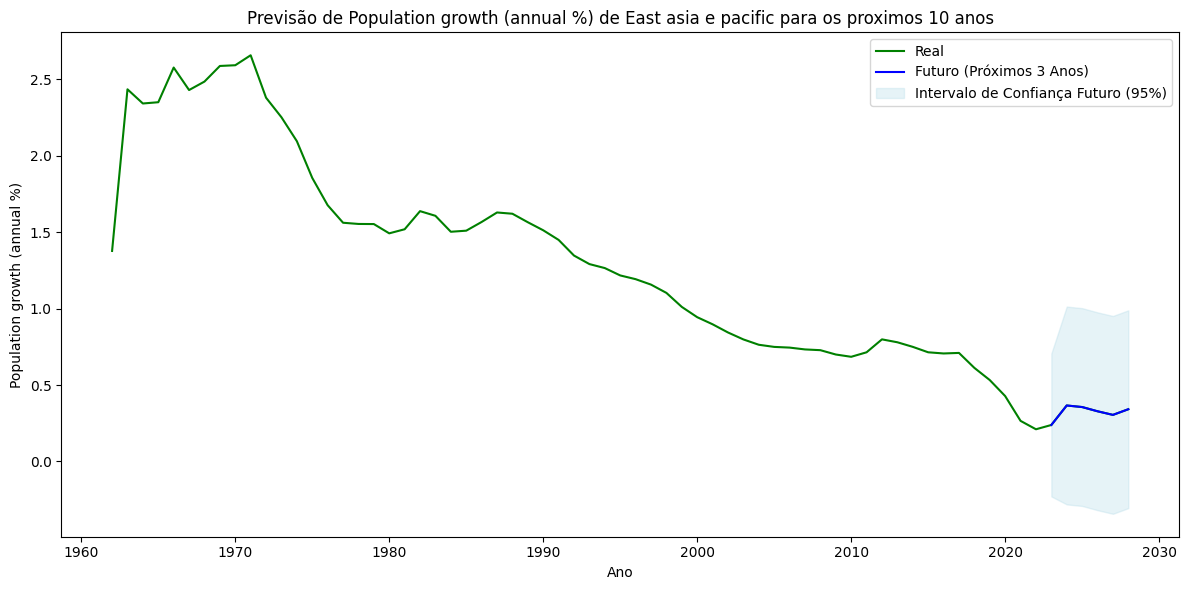

Previsões para os próximos 6 anos:
             Ano  Previsão  IC Inferior (95%)  IC Superior (95%)
2023-01-01  2023  0.238837          -0.228726           0.706399
2024-01-01  2024  0.366319          -0.280731           1.013368
2025-01-01  2025  0.356075          -0.290975           1.003124
2026-01-01  2026  0.328440          -0.318609           0.975490
2027-01-01  2027  0.304822          -0.342227           0.951872
2028-01-01  2028  0.341867          -0.305183           0.988916


In [ ]:
train_size = int(len(data))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

model = SARIMAX(
    train_data['Population growth (annual %) [SP.POP.GROW]'],
    order=best_order,
    seasonal_order=best_seasonal_order
)
model_fit = model.fit()


# Prever os próximos 6 anoss
future_steps = 6
forecast_future = model_fit.get_forecast(steps=future_steps)
predictions_future = forecast_future.predicted_mean
conf_int_future = forecast_future.conf_int()

# Criar um índice de datas para os próximos 3 anos
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='YS-JAN')[1:]
future_dates
# Plotar as previsões contra os valores reais e futuros

concatenated_data = pd.concat([train_data['Population growth (annual %) [SP.POP.GROW]'], predictions_future])

# Reset index for both series before concatenation
train_data_reset = train_data['Population growth (annual %) [SP.POP.GROW]'].reset_index()
predictions_future_reset = predictions_future.reset_index()

# Rename columns for clarity
train_data_reset.columns = ['Time', 'Population Growth']
predictions_future_reset.columns = ['Time', 'Population Growth']

# Concatenate the dataframes
combined_df = pd.concat([train_data_reset, predictions_future_reset], ignore_index=True)

# Set 'Time' as the index again
combined_df = combined_df.set_index('Time')

# Print or use the combined dataframe as needed
combined_df
# Plotar as previsões contra os valores reais e futuros
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df, label='Real', color='green')
plt.plot(future_dates, predictions_future, label='Futuro (Próximos 3 Anos)', color='blue')
plt.fill_between(future_dates, conf_int_future.iloc[:, 0], conf_int_future.iloc[:, 1], color='lightblue', alpha=0.3, label='Intervalo de Confiança Futuro (95%)')
plt.legend()
plt.title('Previsão de Population growth (annual %) de East asia e pacific para os proximos 10 anos')
plt.xlabel('Ano')
plt.ylabel('Population growth (annual %)')
plt.tight_layout()
plt.show()

# Exibir as previsões futuras com intervalo de confiança
forecast_table = pd.DataFrame({
    'Ano': future_dates.year,
    'Previsão': predictions_future,
    'IC Inferior (95%)': conf_int_future.iloc[:, 0],
    'IC Superior (95%)': conf_int_future.iloc[:, 1]
})
print("Previsões para os próximos 6 anos:")
print(forecast_table)

# Arima


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 4) RMSE=0.318


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn

ARIMA(2, 2, 3) RMSE=0.120
ARIMA(2, 0, 0) RMSE=0.173
ARIMA(0, 0, 0) RMSE=0.415


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA(2, 1, 0) RMSE=0.182


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA(2, 2, 1) RMSE=0.076


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA(0, 1, 3) RMSE=0.139
ARIMA(2, 0, 2) RMSE=0.126


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA(3, 2, 4) RMSE=0.070


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA(2, 2, 4) RMSE=0.084


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA(1, 1, 4) RMSE=0.110


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA(3, 1, 2) RMSE=0.115


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 4) RMSE=0.136


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA(3, 0, 3) RMSE=0.174


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 0, 4) RMSE=0.109


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA(4, 0, 2) RMSE=0.083
ARIMA(1, 0, 0) RMSE=0.187


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA(1, 1, 3) RMSE=0.163


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA(1, 2, 1) RMSE=0.156


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARIMA(3, 2, 1) RMSE=0.065
Melhor configuração para ARIMA: (3, 2, 1) com RMSE=0.065


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA - MSE: 0.004, RMSE: 0.065, MAE: 0.057


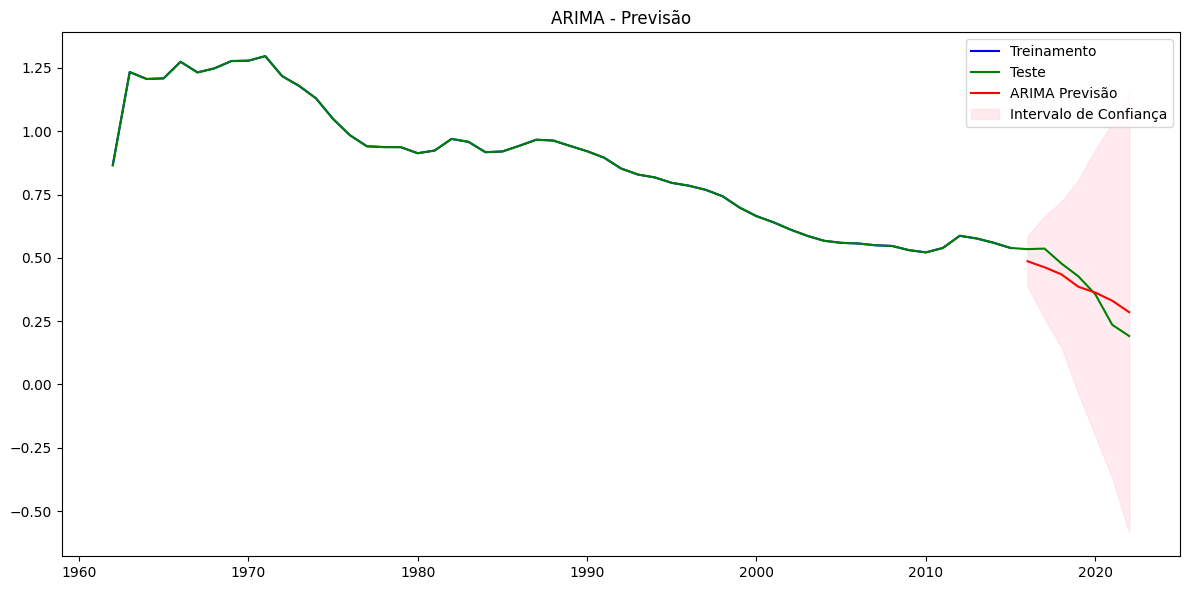

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterSampler

# Carregar dados
df = pd.read_csv('/content/drive/MyDrive/Base dados/East asia e pacific.csv')
df.dropna(inplace=True)

# Converter a coluna 'Time' para o formato datetime e defini-la como índice
df['Time'] = pd.to_datetime(df['Time'], format='%Y')
df = df.set_index('Time')

# Selecionar a série temporal
data = df['Population growth (annual %) [SP.POP.GROW]'].resample('YS').first()
data = np.log1p(data)  # Transformação logarítmica para suavizar variações

# Divisão em treino e teste
train_size = int(len(data) * 0.90)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Função para avaliar ARIMA
def evaluate_arima_model(train, test, order):
    try:
        # Ajustar modelo ARIMA
        model = SARIMAX(train, order=order, seasonal_order=(0, 0, 0, 0))
        model_fit = model.fit(disp=False)

        # Fazer previsões
        forecast = model_fit.get_forecast(steps=len(test))
        predictions = forecast.predicted_mean

        # Calcular RMSE
        rmse = mean_squared_error(test, predictions, squared=False)
        return rmse
    except Exception as e:
        print(f"Erro com ARIMA{order}: {e}")
        return float("inf")

# Parâmetros para ARIMA
param_dist_arima = {
    'p': range(0, 5),
    'd': range(0, 3),
    'q': range(0, 5),
}

# Random Search para ARIMA
n_iter = 20
best_score_arima, best_order_arima = float("inf"), None
random_samples_arima = list(ParameterSampler(param_dist_arima, n_iter=n_iter, random_state=42))

for params in random_samples_arima:
    order = (params['p'], params['d'], params['q'])
    rmse = evaluate_arima_model(train_data, test_data, order)
    if rmse < best_score_arima:
        best_score_arima, best_order_arima = rmse, order
    print(f'ARIMA{order} RMSE={rmse:.3f}')

print(f"Melhor configuração para ARIMA: {best_order_arima} com RMSE={best_score_arima:.3f}")

# Ajustar e prever com o melhor modelo ARIMA
model_arima = SARIMAX(train_data, order=best_order_arima, seasonal_order=(0, 0, 0, 0))
model_arima_fit = model_arima.fit()

forecast_arima = model_arima_fit.get_forecast(steps=len(test_data))
predictions_arima = forecast_arima.predicted_mean
conf_int_arima = forecast_arima.conf_int()
mse_arima = mean_squared_error(test_data, predictions_arima) # Changed this line
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(test_data, predictions_arima) # Changed this line as well

print(f"ARIMA - MSE: {mse_arima:.3f}, RMSE: {rmse_arima:.3f}, MAE: {mae_arima:.3f}")

# Plotar ARIMA
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Treinamento', color='blue')
plt.plot(data, label='Teste', color='green')
plt.plot(test_data.index, predictions_arima, label='ARIMA Previsão', color='red')
plt.fill_between(test_data.index, conf_int_arima.iloc[:, 0], conf_int_arima.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confiança')
plt.legend()
plt.title('ARIMA - Previsão')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


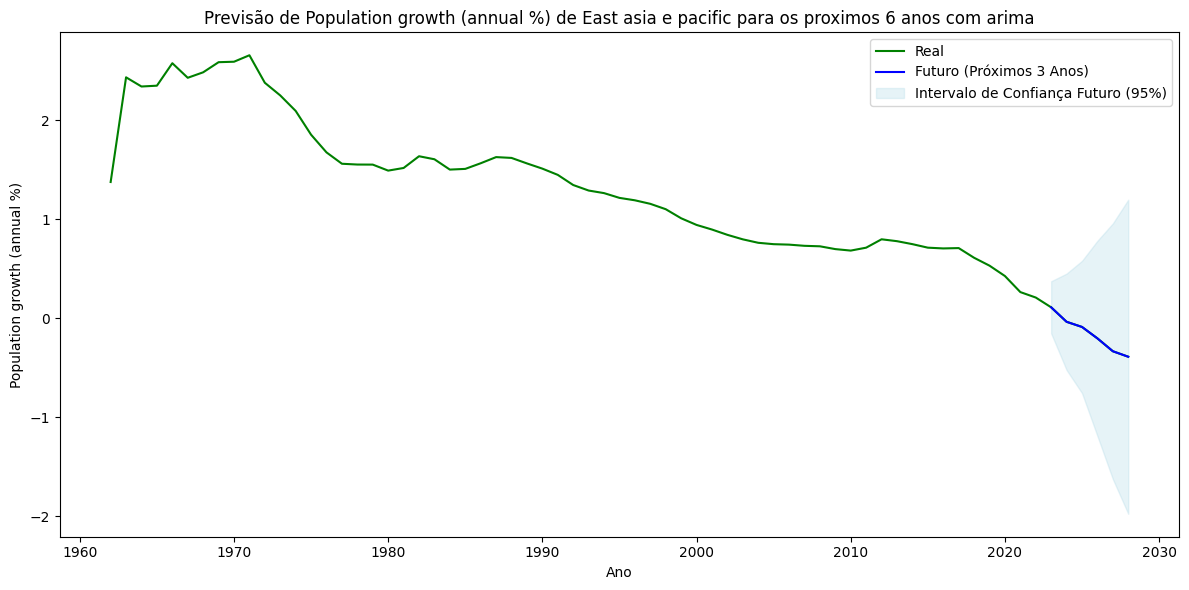

Previsões para os próximos 6 anos:
             Ano  Previsão  IC Inferior (95%)  IC Superior (95%)
2023-01-01  2023  0.111847          -0.151463           0.375156
2024-01-01  2024 -0.034290          -0.521051           0.452471
2025-01-01  2025 -0.086437          -0.754572           0.581698
2026-01-01  2026 -0.201907          -1.187849           0.784036
2027-01-01  2027 -0.331677          -1.622701           0.959347
2028-01-01  2028 -0.387166          -1.973281           1.198950


In [ ]:
train_size = int(len(data))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

model = SARIMAX(
    train_data['Population growth (annual %) [SP.POP.GROW]'],
    order=best_order_arima,
    seasonal_order=(0,0,0,0)
)
model_fit = model.fit()


# Prever os próximos 6 anoss
future_steps = 6
forecast_future = model_fit.get_forecast(steps=future_steps)
predictions_future = forecast_future.predicted_mean
conf_int_future = forecast_future.conf_int()

# Criar um índice de datas para os próximos 3 anos
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='YS-JAN')[1:]
future_dates
# Plotar as previsões contra os valores reais e futuros

concatenated_data = pd.concat([train_data['Population growth (annual %) [SP.POP.GROW]'], predictions_future])

# Reset index for both series before concatenation
train_data_reset = train_data['Population growth (annual %) [SP.POP.GROW]'].reset_index()
predictions_future_reset = predictions_future.reset_index()

# Rename columns for clarity
train_data_reset.columns = ['Time', 'Population Growth']
predictions_future_reset.columns = ['Time', 'Population Growth']

# Concatenate the dataframes
combined_df = pd.concat([train_data_reset, predictions_future_reset], ignore_index=True)

# Set 'Time' as the index again
combined_df = combined_df.set_index('Time')

# Print or use the combined dataframe as needed
combined_df
# Plotar as previsões contra os valores reais e futuros
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df, label='Real', color='green')
plt.plot(future_dates, predictions_future, label='Futuro (Próximos 3 Anos)', color='blue')
plt.fill_between(future_dates, conf_int_future.iloc[:, 0], conf_int_future.iloc[:, 1], color='lightblue', alpha=0.3, label='Intervalo de Confiança Futuro (95%)')
plt.legend()
plt.title('Previsão de Population growth (annual %) de East asia e pacific para os proximos 6 anos com arima')
plt.xlabel('Ano')
plt.ylabel('Population growth (annual %)')
plt.tight_layout()
plt.show()

# Exibir as previsões futuras com intervalo de confiança
forecast_table = pd.DataFrame({
    'Ano': future_dates.year,
    'Previsão': predictions_future,
    'IC Inferior (95%)': conf_int_future.iloc[:, 0],
    'IC Superior (95%)': conf_int_future.iloc[:, 1]
})
print("Previsões para os próximos 6 anos:")
print(forecast_table)

#Arma


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARMA(1, 3) RMSE=0.120


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local

ARMA(3, 1) RMSE=0.170
ARMA(0, 0) RMSE=0.415


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARMA(4, 3) RMSE=0.162


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARMA(2, 1) RMSE=0.167


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(1, 4) RMSE=0.109


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/d

ARMA(2, 3) RMSE=0.090
ARMA(0, 1) RMSE=0.378


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(4, 2) RMSE=0.083
ARMA(1, 0) RMSE=0.187


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARMA(0, 2) RMSE=0.359
ARMA(2, 2) RMSE=0.126


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(3, 0) RMSE=0.160


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(0, 3) RMSE=0.349


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARMA(0, 4) RMSE=0.318


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(4, 0) RMSE=0.117


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARMA(3, 2) RMSE=0.125


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(4, 1) RMSE=0.091


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARMA(3, 3) RMSE=0.174


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(4, 4) RMSE=0.111
Melhor configuração para ARMA: (4, 2) com RMSE=0.083


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA - MSE: 0.007, RMSE: 0.083, MAE: 0.067


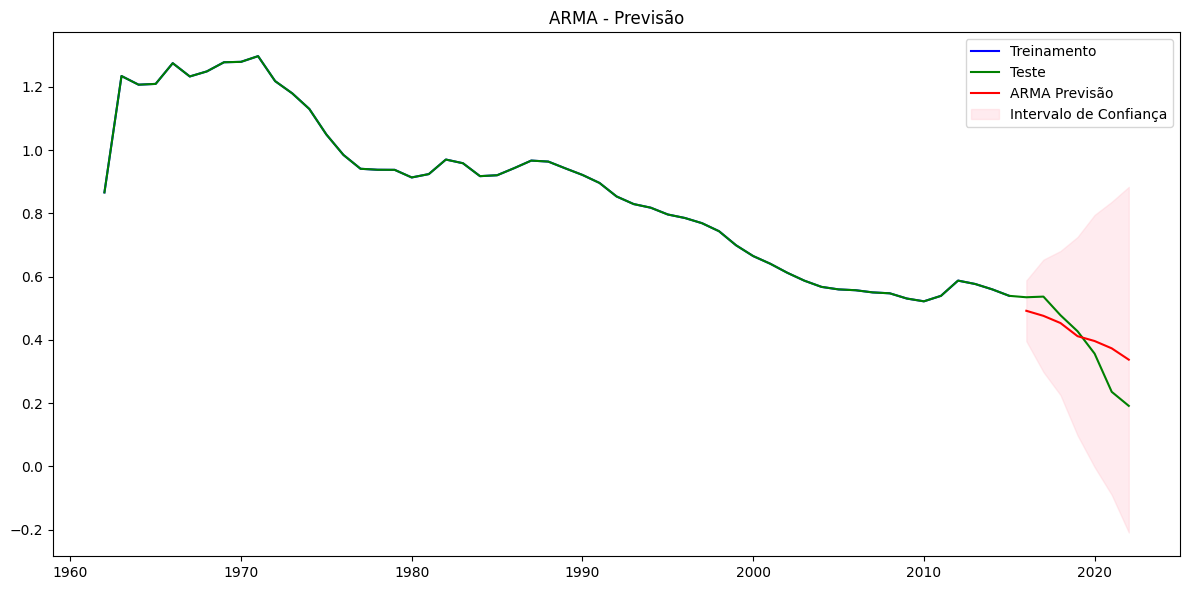

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterSampler

# Carregar dados
df = pd.read_csv('/content/drive/MyDrive/Base dados/East asia e pacific.csv')
df.dropna(inplace=True)

# Converter a coluna 'Time' para o formato datetime e defini-la como índice
df['Time'] = pd.to_datetime(df['Time'], format='%Y')
df = df.set_index('Time')

# Selecionar a série temporal
data = df['Population growth (annual %) [SP.POP.GROW]'].resample('YS').first()
data = np.log1p(data)  # Transformação logarítmica para suavizar variações

# Divisão em treino e teste
train_size = int(len(data) * 0.90)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]
# Função para avaliar ARMA
def evaluate_arma_model(train, test, order):
    try:
        # Ajustar modelo ARMA (d=0)
        model = SARIMAX(train, order=(order[0], 0, order[1]), seasonal_order=(0, 0, 0, 0))
        model_fit = model.fit(disp=False)

        # Fazer previsões
        forecast = model_fit.get_forecast(steps=len(test))
        predictions = forecast.predicted_mean

        # Calcular RMSE
        rmse = mean_squared_error(test, predictions, squared=False)
        return rmse
    except Exception as e:
        print(f"Erro com ARMA{order}: {e}")
        return float("inf")

# Parâmetros para ARMA
param_dist_arma = {
    'p': range(0, 5),
    'q': range(0, 5),
}

# Random Search para ARMA
best_score_arma, best_order_arma = float("inf"), None
random_samples_arma = list(ParameterSampler(param_dist_arma, n_iter=n_iter, random_state=42))

for params in random_samples_arma:
    order = (params['p'], params['q'])
    rmse = evaluate_arma_model(train_data, test_data, order)
    if rmse < best_score_arma:
        best_score_arma, best_order_arma = rmse, order
    print(f'ARMA{order} RMSE={rmse:.3f}')

print(f"Melhor configuração para ARMA: {best_order_arma} com RMSE={best_score_arma:.3f}")

# Ajustar e prever com o melhor modelo ARMA
model_arma = SARIMAX(train_data, order=(best_order_arma[0], 0, best_order_arma[1]), seasonal_order=(0, 0, 0, 0))
model_arma_fit = model_arma.fit()

forecast_arma = model_arma_fit.get_forecast(steps=len(test_data))
predictions_arma = forecast_arma.predicted_mean
conf_int_arma = forecast_arma.conf_int()

mse_arma = mean_squared_error(test_data, predictions_arma)
rmse_arma = np.sqrt(mse_arma)
mae_arma = mean_absolute_error(test_data, predictions_arma)

print(f"ARMA - MSE: {mse_arma:.3f}, RMSE: {rmse_arma:.3f}, MAE: {mae_arma:.3f}")
# Plotar ARMA
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Treinamento', color='blue')
plt.plot(data, label='Teste', color='green')
plt.plot(test_data.index, predictions_arma, label='ARMA Previsão', color='red')
plt.fill_between(test_data.index, conf_int_arma.iloc[:, 0], conf_int_arma.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confiança')
plt.legend()
plt.title('ARMA - Previsão')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


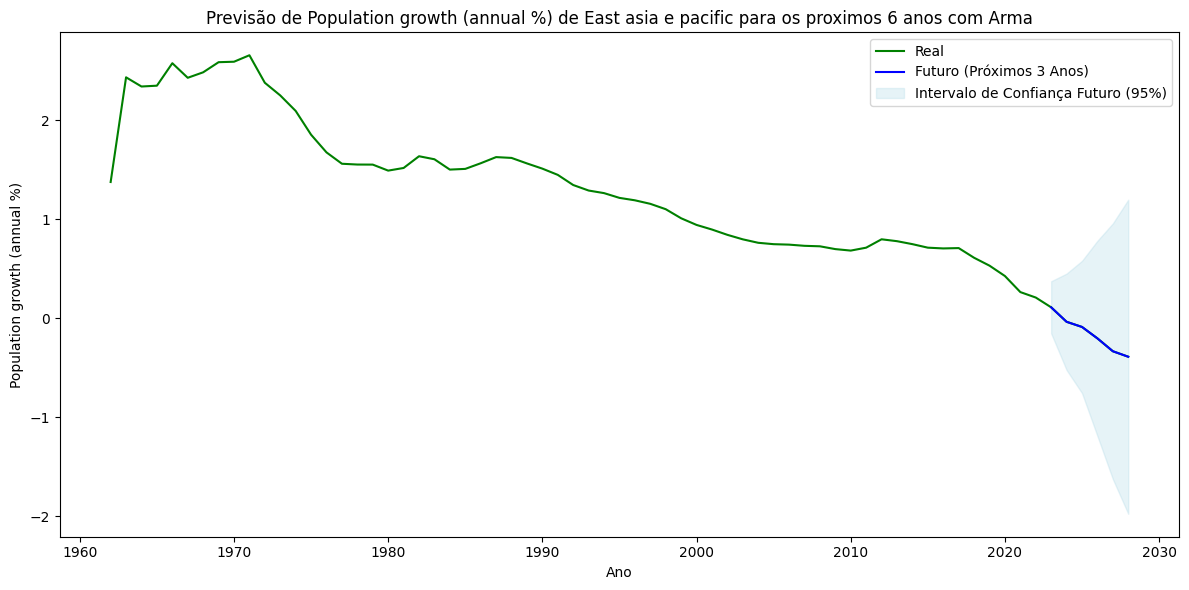

Previsões arma para os próximos 6 anos:
             Ano  Previsão  IC Inferior (95%)  IC Superior (95%)
2023-01-01  2023  0.111847          -0.151463           0.375156
2024-01-01  2024 -0.034290          -0.521051           0.452471
2025-01-01  2025 -0.086437          -0.754572           0.581698
2026-01-01  2026 -0.201907          -1.187849           0.784036
2027-01-01  2027 -0.331677          -1.622701           0.959347
2028-01-01  2028 -0.387166          -1.973281           1.198950


In [ ]:
train_size = int(len(data))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Select the specific column for forecasting
endog_data = train_data['Population growth (annual %) [SP.POP.GROW]']

model = SARIMAX(
    endog_data,  # Pass the numeric column instead of the entire DataFrame
    order=(best_order_arma[0], 0, best_order_arma[1]),
    seasonal_order=(0, 0, 0, 0)  # Sem sazonalidade
)
model_arma_fit = model_arma.fit()

# Prever os próximos 6 anoss
future_steps = 6
forecast_future = model_fit.get_forecast(steps=future_steps)
predictions_future = forecast_future.predicted_mean
conf_int_future = forecast_future.conf_int()

# Criar um índice de datas para os próximos 3 anos
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='YS-JAN')[1:]
future_dates
# Plotar as previsões contra os valores reais e futuros

concatenated_data = pd.concat([train_data['Population growth (annual %) [SP.POP.GROW]'], predictions_future])

# Reset index for both series before concatenation
train_data_reset = train_data['Population growth (annual %) [SP.POP.GROW]'].reset_index()
predictions_future_reset = predictions_future.reset_index()

# Rename columns for clarity
train_data_reset.columns = ['Time', 'Population Growth']
predictions_future_reset.columns = ['Time', 'Population Growth']

# Concatenate the dataframes
combined_df = pd.concat([train_data_reset, predictions_future_reset], ignore_index=True)

# Set 'Time' as the index again
combined_df = combined_df.set_index('Time')

# Print or use the combined dataframe as needed
combined_df
# Plotar as previsões contra os valores reais e futuros
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df, label='Real', color='green')
plt.plot(future_dates, predictions_future, label='Futuro (Próximos 3 Anos)', color='blue')
plt.fill_between(future_dates, conf_int_future.iloc[:, 0], conf_int_future.iloc[:, 1], color='lightblue', alpha=0.3, label='Intervalo de Confiança Futuro (95%)')
plt.legend()
plt.title('Previsão de Population growth (annual %) de East asia e pacific para os proximos 6 anos com Arma')
plt.xlabel('Ano')
plt.ylabel('Population growth (annual %)')
plt.tight_layout()
plt.show()

# Exibir as previsões futuras com intervalo de confiança
forecast_table = pd.DataFrame({
    'Ano': future_dates.year,
    'Previsão': predictions_future,
    'IC Inferior (95%)': conf_int_future.iloc[:, 0],
    'IC Superior (95%)': conf_int_future.iloc[:, 1]
})
print("Previsões arma para os próximos 6 anos:")
print(forecast_table)